In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import *

In [14]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [15]:
value_function_employment(model.par, model.par.w, -1 )

11.901041135161927

In [16]:
unemployed_ss(model.par,1)

(0.038427803782077115, -244.6521182448876)

In [17]:
search_effort = solve_search_effort(model.par)
print(np.shape(search_effort))


(2, 43)


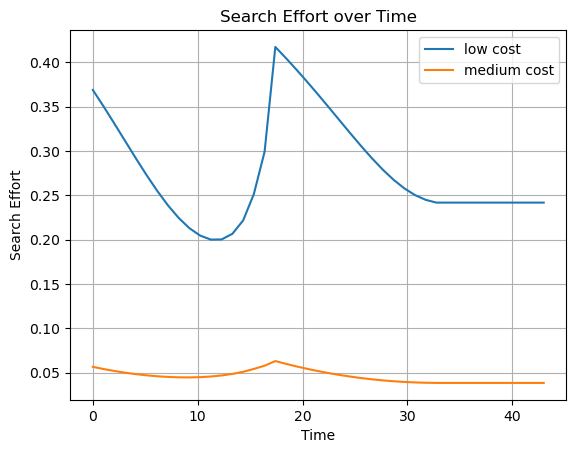

In [18]:

time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort[0,:], label = 'low cost') 
plt.plot(time, search_effort[1,:], label = 'medium cost') 
#plt.plot(time, search_effort[2,:], label = 'high' ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()


In [19]:
sim = sim_search_effort(model.par)

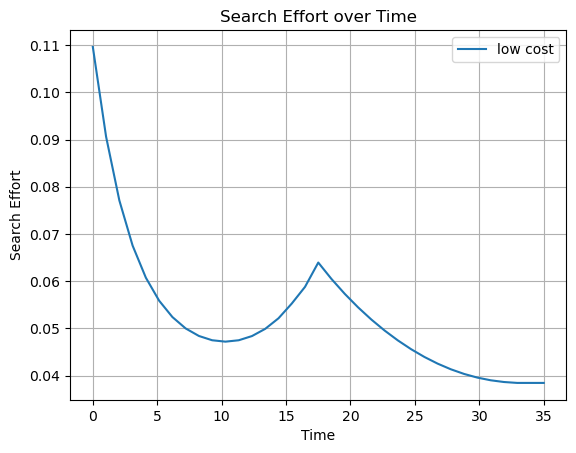

In [20]:
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, sim, label = 'low cost') 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()


In [21]:
from estimation import *

In [22]:
est_par = ['gamma', 'sigma', 'cost1', 'cost2'] # Parameters to estimate
theta0 = [0.9, 0.1, 100.0, 100.0] # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0.0,500.0), (0.0,500.0)] # Bounds for the parameters

est = method_simulated_moments(model, est_par,theta0,bounds)


(35, 1)
[  0.9   0.1 100.  100. ]
(35, 1)
[  0.945   0.1   100.    100.   ]
(35, 1)
[  0.9     0.105 100.    100.   ]
(35, 1)
[9.00e-01 1.00e-01 1.05e+02 1.00e+02]
(35, 1)
[9.00e-01 1.00e-01 1.00e+02 1.05e+02]
(35, 1)
[  0.855    0.1025 102.5    102.5   ]
(35, 1)
[  0.81      0.10375 103.75    103.75   ]
(35, 1)
[8.55000e-01 9.68750e-02 1.04375e+02 1.04375e+02]
(35, 1)
[8.325000e-01 1.003125e-01 1.065625e+02 1.065625e+02]
(35, 1)
[7.9875000e-01 1.0046875e-01 1.0234375e+02 1.0984375e+02]
(35, 1)
[7.48125000e-01 1.00703125e-01 1.01015625e+02 1.14765625e+02]
(35, 1)
[7.22812500e-01 1.00820313e-01 1.07851562e+02 1.09726562e+02]
(35, 1)
[6.34218750e-01 1.01230469e-01 1.11777344e+02 1.12089844e+02]
(35, 1)
[6.57421875e-01 1.06123047e-01 1.07177734e+02 1.14208984e+02]
(35, 1)
[5.92382812e-01 1.05590820e-01 1.05297852e+02 1.15844727e+02]
(35, 1)
[4.72324219e-01 1.08229980e-01 1.04665527e+02 1.20485840e+02]
(35, 1)
[4.46044922e-01 1.04393311e-01 1.08568115e+02 1.27025146e+02]
(35, 1)
[2.6406738

c:\Users\rasmu\OneDrive\KU - Økonomi\Dynamic Programming\Term_Paper\Dynamic-programming-project\Funcs.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  inv_c_marg[0] = (s/par.cost1)**(1/par.gamma)
c:\Users\rasmu\OneDrive\KU - Økonomi\Dynamic Programming\Term_Paper\Dynamic-programming-project\Funcs.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  inv_c_marg[1] = (s/par.cost2)**(1/par.gamma)
c:\Users\rasmu\OneDrive\KU - Økonomi\Dynamic Programming\Term_Paper\Dynamic-programming-project\hand_to_mouth.py:66: RuntimeWarning: invalid value encountered in scalar add
  V_u[i,t] = utility(par,income,r) - cost(par,s[i,t])[i] + par.delta * (s[i,t] * V_e_next+(1-s[i,t])*V_u[i,t+1])


(35, 1)
[1.04318619e-01 1.03756952e-01 1.22158480e+02 1.41197634e+02]
(35, 1)
[1.96320019e-01 1.04875209e-01 1.17785242e+02 1.36019685e+02]
(35, 1)
[0.00000000e+00 1.08236917e-01 1.18146142e+02 1.47657956e+02]
(35, 1)
[3.42137582e-01 1.05153039e-01 1.13321778e+02 1.27932169e+02]
(35, 1)
[3.73379191e-01 1.06406947e-01 1.14509809e+02 1.29897070e+02]
(35, 1)
[2.13966441e-01 1.05867522e-01 1.14632892e+02 1.34016206e+02]
(35, 1)
[1.27984896e-01 1.07298862e-01 1.16517507e+02 1.40396171e+02]
(35, 1)
[2.88599411e-01 1.05689495e-01 1.14120711e+02 1.31048170e+02]
(35, 1)
[2.15585513e-01 1.01127490e-01 1.12474744e+02 1.41915322e+02]
(35, 1)
[1.90432713e-01 9.69681822e-02 1.10570484e+02 1.48893948e+02]
(35, 1)
[1.43793867e-01 1.00523445e-01 1.12862185e+02 1.47748110e+02]
(35, 1)
[1.83340550e-01 9.76733790e-02 1.11464650e+02 1.51646025e+02]
(35, 1)
[1.68027605e-01 9.35763076e-02 1.09880529e+02 1.60460935e+02]
(35, 1)
[1.86840765e-01 9.30162407e-02 1.04359944e+02 1.61863171e+02]
(35, 1)
[1.82101139e

In [23]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.0000
Parameters:              0.031, 1.828, 342.120, 342.146
Number of iterations:    478


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


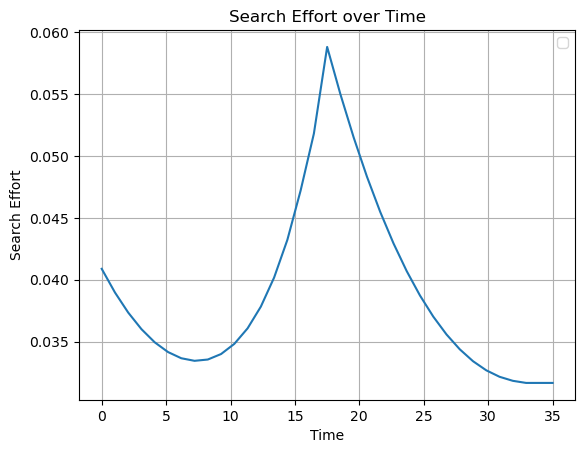

In [24]:
sim = sim_search_effort(model.par)
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, sim, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()
